In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bifurcation import bifurcation_point, draw_bifurcation

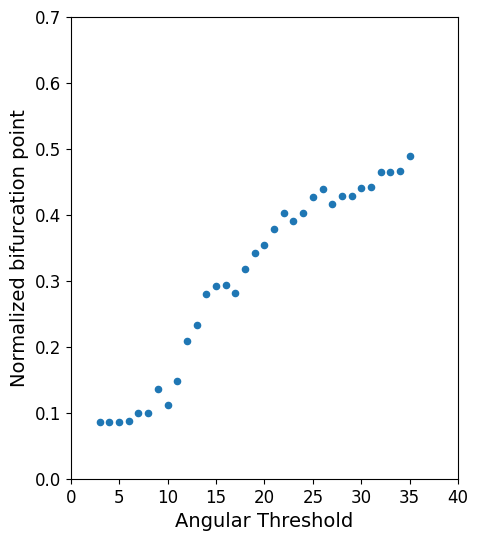

In [ ]:
fig, ax = plt.subplots(figsize=(5,6))

num_reached = []

for i in range(3,36):
    df_cen = pd.read_csv(f'../output/bif_over_angthresh/centroid_{i}deg.txt', sep='\t')
    num_reached.append(len(df_cen[df_cen['cue_reached']!=-1].replicate.unique()))
#print(min(num_reached))

ang_thresh = []
bif_point =[]
df_tar = pd.read_csv('../output/bif_over_angthresh/targets_5deg.txt', sep='\t')
    
for i in range(3,36):
    df_cen = pd.read_csv(f'../output/bif_over_angthresh/centroid_{i}deg.txt', sep='\t')
    reached = df_cen[df_cen['cue_reached']!=-1].replicate.head(min(num_reached))
    df_cen = df_cen[df_cen.replicate.isin(reached)]
    ang_thresh.append(i)
    bif_point.append(bifurcation_point(df_cen))
    
bif_point[:] = [x / df_tar.loc[df_tar.id==0,:].x for x in bif_point]
plt.scatter(ang_thresh, bif_point, s=20, alpha = 1)
plt.xticks(np.arange(0, 45, 5), size=12)
plt.yticks(np.arange(0, 0.8, 0.1), size=12)
plt.xlabel('Angular Threshold', size=14)
plt.ylabel('Normalized bifurcation point', size=14);